In [1]:
#TODO 1
import tensorflow as tf 
tf.config.list_physical_devices("GPU")

2023-11-29 19:09:11.597053: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[]

In [2]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# TODO 2:
from tensorflow.keras import backend as K 
K.clear_session()

In [5]:
# TODO 3: 

nrow = 150
ncol = 150

In [6]:
# TODO 4: 

from keras.applications.vgg16 import VGG16

input_shape = (nrow,ncol,3)
base_model = applications.VGG16(include_top=False, weights='imagenet',input_shape = input_shape)

In [7]:
model = Sequential()

# TODO 5:
for layer in base_model.layers: 
    model.add(layer)

In [8]:
# TODO 6
for layer in model.layers: 
    layer.trainable = False

In [9]:
#TODO 7
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
#TODO 8
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)       2

In [11]:
import os
import requests
from urllib.parse import urlencode
import urllib.request

api_key = 'a6b19c760b907d83954c80021acc6094'

keywords = ['car', 'bicycle']

num_images_per_category_train = 1000
num_images_per_category_test = 300

download_path = './dataset/'

train_path = download_path + 'train/' 
test_path = download_path + 'test/' 

for category in keywords:
    os.makedirs(train_path + category, exist_ok=True) 
    os.makedirs(test_path + category, exist_ok=True)

def download_images(category, num_images, path):
    base_url = "https://www.flickr.com/services/rest/"
    params = {
        'method': 'flickr.photos.search',
        'api_key': api_key,
        'text': category,
        'format': 'json',
        'nojsoncallback': '1',
        'per_page': num_images,
        'media': 'photos',
        'extras': 'url_c',
        'sort': 'relevance',
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check if the key 'photos' is in the JSON response
        if 'photos' in data and 'photo' in data['photos']:
            for i, photo in enumerate(data['photos']['photo']):
                if 'url_c' in photo:
                    url = photo['url_c']
                    image_path = os.path.join(path, f'{category}_{i}.jpg')
                    urllib.request.urlretrieve(url, image_path)
                else:
                    print(f"No URL found for image {i} in category '{category}'.")
        else:
            print(f"Unexpected JSON structure: {data}")
            # Handle the lack of 'photos' key
            if 'message' in data:
                print(f"Error message from Flickr API: {data['message']}")
            else:
                print("Key 'photos' not found in the JSON response.")
                
    except Exception as e:
        print(f"An error occurred: {e}")

print("Download started!")

# Download images for training dataset
for category in keywords:
    print(f"Downloading training images for category: '{category}'")
    download_images(category, num_images_per_category_train, train_path + category)
print("Download for training images: DONE!")

# Download images for testing dataset
for category in keywords:
    print(f"Downloading testing images for category: '{category}'")
    download_images(category, num_images_per_category_test, test_path + category)
print("Download for testing images: DONE!")


Download started!
No URL found for image 0 in category 'car'.
No URL found for image 9 in category 'car'.
No URL found for image 38 in category 'car'.
No URL found for image 48 in category 'car'.
No URL found for image 114 in category 'car'.
No URL found for image 128 in category 'car'.
No URL found for image 134 in category 'car'.
No URL found for image 142 in category 'car'.
No URL found for image 144 in category 'car'.
No URL found for image 161 in category 'car'.
No URL found for image 166 in category 'car'.
No URL found for image 167 in category 'car'.
No URL found for image 170 in category 'car'.
No URL found for image 199 in category 'car'.
No URL found for image 208 in category 'car'.
No URL found for image 225 in category 'car'.
No URL found for image 264 in category 'car'.
No URL found for image 280 in category 'car'.
No URL found for image 297 in category 'car'.
No URL found for image 310 in category 'car'.
No URL found for image 325 in category 'car'.
No URL found for image

In [12]:
train_data_dir = './dataset/train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(nrow,ncol),batch_size=batch_size, 
                                                    class_mode='binary')

Found 997 images belonging to 2 classes.


In [13]:
# TODO 9

test_data_dir = './dataset/test'
test_generator = train_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(nrow, ncol),batch_size=batch_size,
                                                   class_mode='binary')

Found 596 images belonging to 2 classes.


In [14]:
def disp_image(im):
    if (len(im.shape) == 2):
        
        plt.imshow(im, cmap='gray') 
    else:
        # Color image.
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

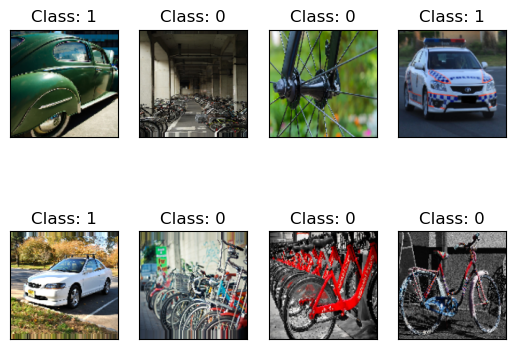

In [15]:
# TODO 10
X, y = train_generator.next() 
nplot = 8
for i in range(nplot):
    plt.subplot(2, 4, i+1) 
    disp_image(X[i]) 
    plt.title(f'Class: {int(y[i])}')
plt.show()

In [16]:
# TODO 11
# model.compile(...) 
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.legacy.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [17]:
#TODO 12
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size

In [18]:
nepochs = 5 # Doing 5 epochs

hist = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Epoch 1/5
31/31 [==============================] - 86s 3s/step - loss: 0.3744 - accuracy: 0.8487 - val_loss: 0.2824 - val_accuracy: 0.8715
Epoch 2/5
31/31 [==============================] - 89s 3s/step - loss: 0.1566 - accuracy: 0.9482 - val_loss: 0.1139 - val_accuracy: 0.9618
Epoch 3/5
31/31 [==============================] - 84s 3s/step - loss: 0.1177 - accuracy: 0.9565 - val_loss: 0.0987 - val_accuracy: 0.9705
Epoch 4/5
31/31 [==============================] - 84s 3s/step - loss: 0.0882 - accuracy: 0.9689 - val_loss: 0.0796 - val_accuracy: 0.9722
Epoch 5/5
31/31 [==============================] - 84s 3s/step - loss: 0.0953 - accuracy: 0.9648 - val_loss: 0.0808 - val_accuracy: 0.9757


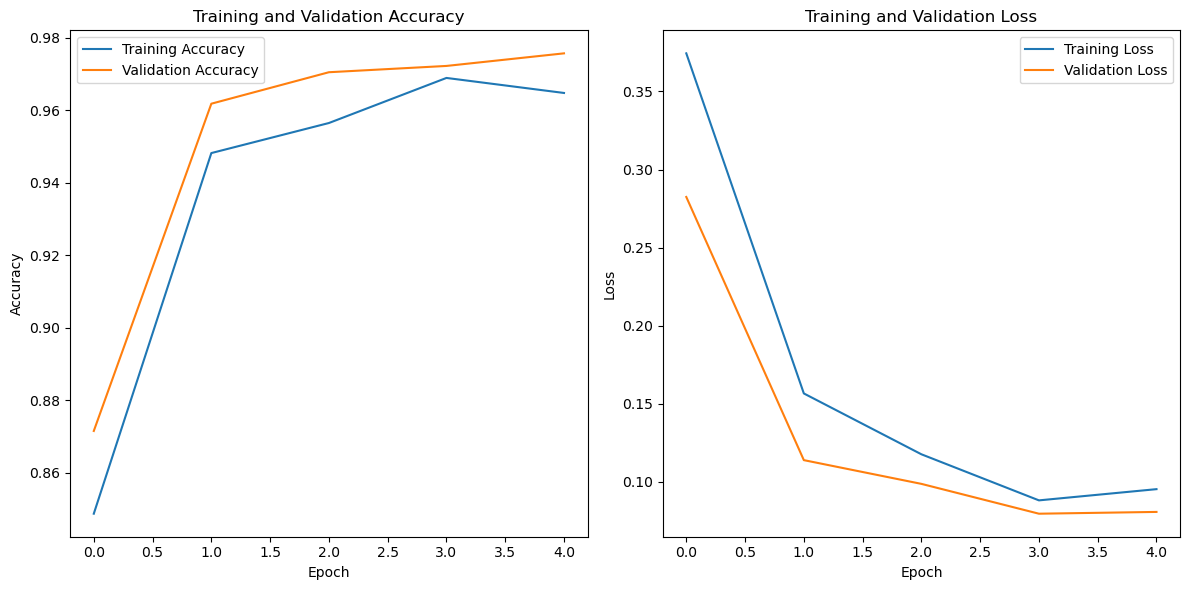

In [19]:
# Plot the training accuracy and validation accuracy curves on the same figure.

# TODO 13
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 2s 2s/step


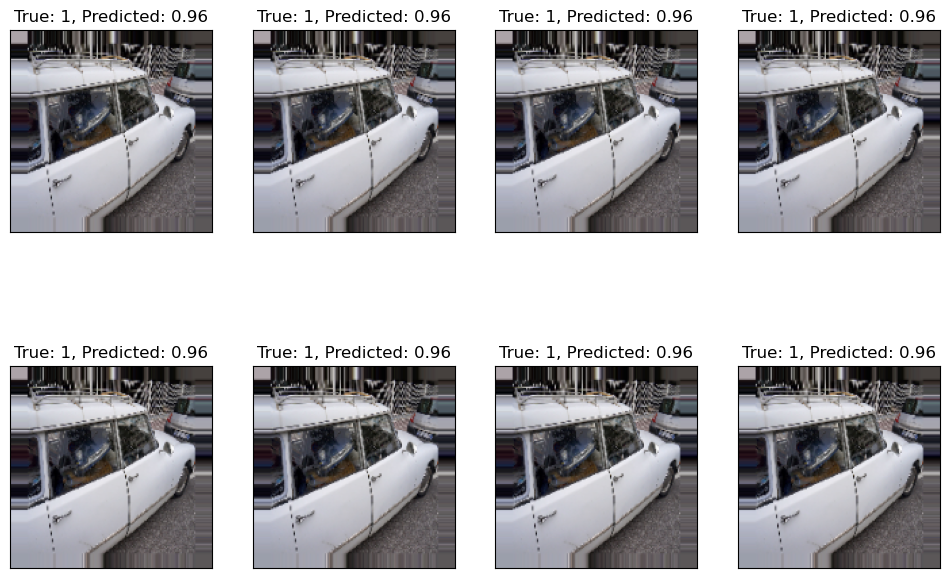

In [20]:
# TODO 14
Xts, yts = test_generator.next()
yhat = model.predict(Xts)

# Find images where yts[i] ~ yhat[i]
error_indices = np.where(np.round(yhat) != yts)[0]

# Show error images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(error_indices[:8]):
    plt.subplot(2, 4, i+1)
    disp_image(Xts[idx])
    plt.title(f'True: {int(yts[idx])}, Predicted: {yhat[idx][0]:.2f}')
    
plt.show()